In [1]:
!pip install gym

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
import random

# **Deterministic Environment**

In [4]:
class deterministicEnv(gym.Env):
  metadata = {'render.modes':[]}
  def __init__(self):
    self.observation_space = spaces.Discrete(36)
    self.action_space = spaces.Discrete(4)
    self.maxtimesteps=40
    self.rewardStates = dict()
    self.rewardStates[(5,5)] = 3
    self.rewardStates[(3,3)] = 1
    self.rewardStates[(4,3)] = 2
    self.rewardStates[(4,5)] = 2

  def reset(self):
    self.timesteps = 0
    self.agent_pos = [0,0]
    self.goal_pos = [5,5]
    self.state = np.zeros((6,6))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5

    observation = self.state.flatten()
    return observation



  def step(self,action):
    self.state = np.random.choice(self.observation_space.n)
    if action == 0: #down
      self.agent_pos[0] +=1
    elif action==1: #up
      self.agent_pos[0] -=1
    elif action==2:#right
      self.agent_pos[1] += 1
    elif action==3: #left
      self.agent_pos[1] -= 1
    
    self.agent_pos = np.clip(self.agent_pos,0,5)
    self.state = np.zeros((6,6))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5
    observation = self.state.flatten()
    reward = 0
    if tuple(self.agent_pos) in self.rewardStates: #Checking if agent is in reward position
      reward = self.rewardStates[tuple(self.agent_pos)]

    self.timesteps +=1
    done = True if self.timesteps >= self.maxtimesteps else False #Ensuring Safety in AI
    info = {}

    return observation, reward, done, info



  def render(self):
    plt.imshow(self.state)

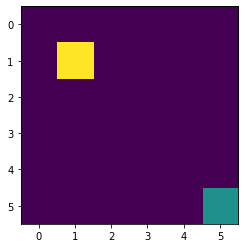

In [18]:
grid = deterministicEnv()
grid.reset()
grid.step(0)
grid.step(2)
grid.render()

# **Stochastic Environment**

In [14]:
class stochasticEnv(gym.Env):
  metadata = {'render.modes':[]}
  def __init__(self):
    self.observation_space = spaces.Discrete(36)
    self.action_space = spaces.Discrete(4)
    self.maxtimesteps=40
    self.rewardStates = dict()
    self.rewardStates[(5,5)] = 3
    self.rewardStates[(3,3)] = 1
    self.rewardStates[(4,3)] = 2
    self.rewardStates[(4,5)] = 2

  def reset(self):
    self.timesteps = 0
    self.agent_pos = [0,0]
    self.goal_pos = [5,5]
    self.state = np.zeros((6,6))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5

    observation = self.state.flatten()
    return observation



  def step(self,action):
    self.state = np.random.choice(self.observation_space.n)
    if action == 0: #down
      self.agent_pos[0] +=1
    elif action==1: #up   
 #Declared a probability for action up. If it's less than 0.2, it should take left or else stay in its current state
      if random.uniform(0, 1)<0.2: 
        self.agent_pos[0] -=1
    elif action==2: #right
      self.agent_pos[1] += 1
    elif action==3: #left
#Declared a probability for action left. If it's less than 0.2, it should take left or else stay in its current state
      if random.uniform(0, 1)<0.2:
        self.agent_pos[1] -= 1
    
    self.agent_pos = np.clip(self.agent_pos,0,5)
    self.state = np.zeros((6,6))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5
    observation = self.state.flatten()

    reward = 0
    if tuple(self.agent_pos) in self.rewardStates:
      reward = self.rewardStates[tuple(self.agent_pos)]

    self.timesteps +=1
    done = True if self.timesteps >= self.maxtimesteps else False #Ensuring Safety in AI
    info = {}

    return observation, reward, done, info



  def render(self):
    plt.imshow(self.state)

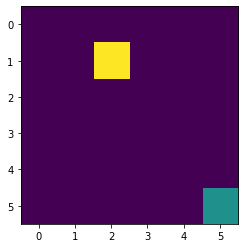

In [22]:
grid = stochasticEnv()
grid.reset()
grid.step(2)
grid.step(0)
grid.step(2)
grid.step(3) #didn't take left
grid.render()
grid.render()